In [2]:
%matplotlib inline
from astropy.io import fits, ascii
from astropy.table import Table
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# CIV, OIII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=197.502432262))


<CompoundModel15(amplitude_0=0.9792732339071665, amplitude_1=0.1164972724329181, mean_1=197.50243226192006, stddev_1=260.01842217453054, amplitude_2=0.1164972724329181, mean_2=695.50243226192, stddev_2=260.01842217453054)>

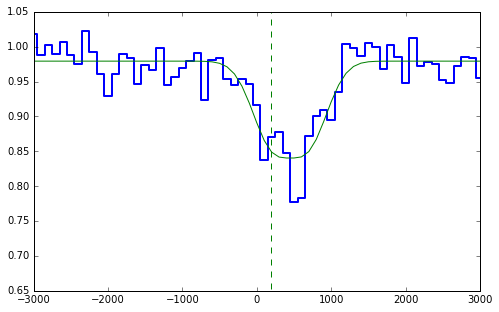

In [7]:
stack = fits.open('Output/QPQ9_zOIII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.amplitude_2.bounds = [0.072,1]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=226.864722917))


<CompoundModel25(amplitude_0=0.98, amplitude_1=0.056942038068541985, mean_1=226.8647229172236, stddev_1=243.61380124167042, amplitude_2=0.056942038068541985, mean_2=724.8647229172236, stddev_2=243.61380124167042)>

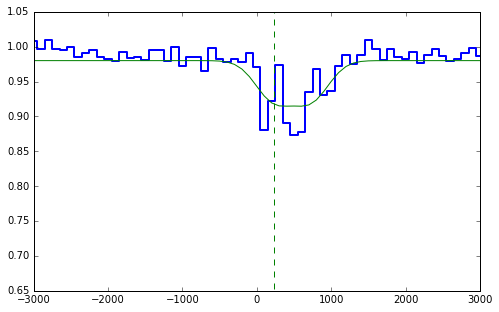

In [14]:
stack = fits.open('Output/QPQ9_zOIII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
model_init.amplitude_0.fixed = True
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.amplitude_2.bounds = [0,0.062]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
# for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_median_fit.dat')
model_final

# CIV, MgII stack

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=93.8025809296))


<CompoundModel40(amplitude_0=0.9776563302469352, amplitude_1=0.048425734867856694, mean_1=93.80258092961407, stddev_1=321.75815569534217, amplitude_2=0.048425734867856694, mean_2=591.8025809296141, stddev_2=321.75815569534217)>

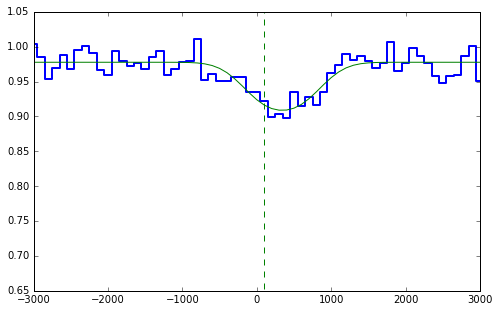

In [23]:
stack = fits.open('Output/QPQ9_zIRMgII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=300.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=300.)
c_init = models.Const1D(amplitude=0.97)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_mean_fit.dat')
model_final

('Centroid velocity in km/s = ', Parameter('mean_1', value=251.120192182))


<CompoundModel30(amplitude_0=0.9866304472083189, amplitude_1=0.04576936712181263, mean_1=251.12019218243438, stddev_1=192.74320655933343, amplitude_2=0.029858258458125942, mean_2=749.1201921824344, stddev_2=192.74320655933343)>

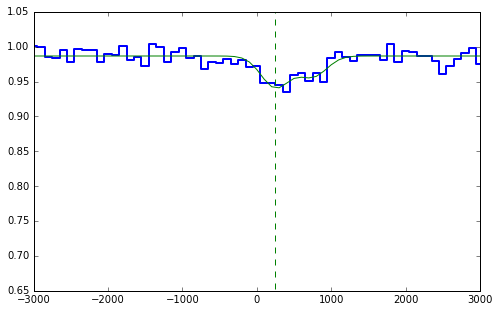

In [18]:
stack = fits.open('Output/QPQ9_zIRMgII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#model_init.amplitude_2.tied = tie_amplitude2
#model_init.amplitude_2.bounds = [0.02/2,0.02]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_median_fit.dat')
model_final

# CII, OIII stack

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=238.702382214))
('Error in centroid and dispersion = ', 31.442661505477403, 33.656983347266916)


<CompoundModel2(amplitude_0=0.9753080968699919, amplitude_1=0.1559061155324042, mean_1=238.70238221422994, stddev_1=349.0363227723907)>

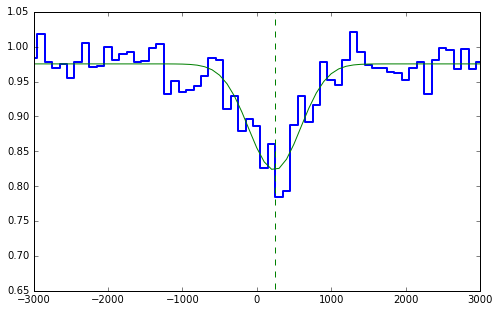

In [5]:
stack = fits.open('Output/QPQ9_zOIII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=170.,stddev=388.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=147.147696754))
('Error in centroid and dispersion = ', 42.534434543956472, 44.869615672220597)


<CompoundModel3(amplitude_0=0.9860957437633592, amplitude_1=0.056398660407425076, mean_1=147.1476967540787, stddev_1=290.01828024592936)>

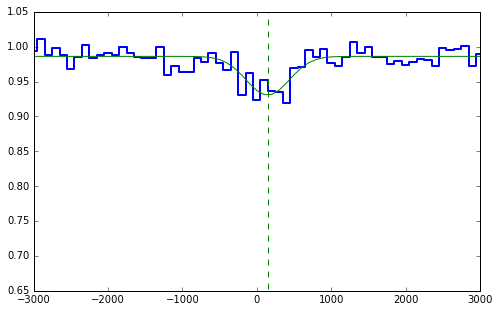

In [6]:
stack = fits.open('Output/QPQ9_zOIII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_median_fit.dat')
model_final

# CII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=206.664287413))
('Error in centroid and dispersion = ', 32.497890243979391, 34.456766918695116)


<CompoundModel19(amplitude_0=0.9707790727547311, amplitude_1=0.13544918925275218, mean_1=206.66428741282783, stddev_1=311.33237816625297)>

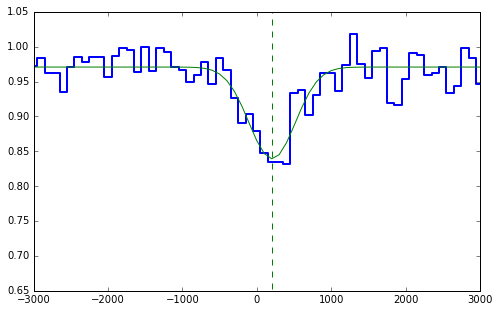

In [18]:
stack = fits.open('Output/QPQ9_zIRMgII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=100.,stddev=300.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_mean_fit.dat')
model_final

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=100.642766631))
('Error in centroid and dispersion = ', 53.414678715723277, 56.786272744451772)


<CompoundModel21(amplitude_0=0.984754778498525, amplitude_1=0.048537751979066145, mean_1=100.64276663146208, stddev_1=322.23736864497505)>

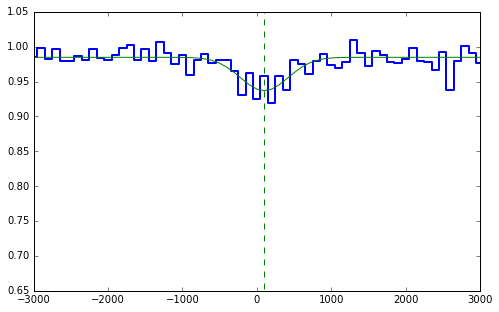

In [20]:
stack = fits.open('Output/QPQ9_zIRMgII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=100.,stddev=300.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_median_fit.dat')
model_final

# MgII, OIII stack

## Mean stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=322.851124871))


<CompoundModel62(amplitude_0=0.949586894220532, amplitude_1=0.16956733934787074, mean_1=322.8511248708484, stddev_1=259.343084820541, amplitude_2=0.11231402091158509, mean_2=1091.8511248708485, stddev_2=259.343084820541)>

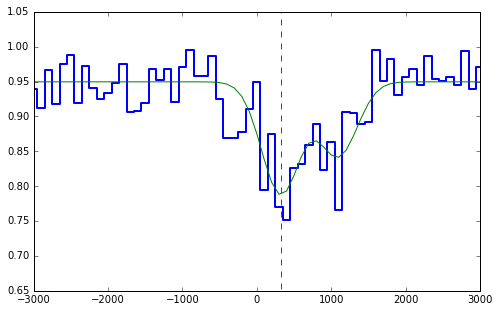

In [36]:
stack = fits.open('Output/QPQ9_zOIII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=200.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=969.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=150.228835543))


<CompoundModel72(amplitude_0=0.9777611313229952, amplitude_1=0.08387638477251531, mean_1=150.22883554289893, stddev_1=303.4989104351093, amplitude_2=0.061441811087066034, mean_2=919.2288355428989, stddev_2=303.4989104351093)>

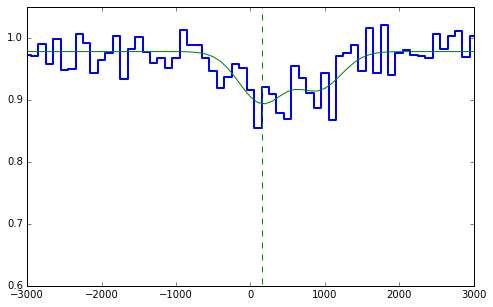

In [42]:
stack = fits.open('Output/QPQ9_zOIII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=250.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1019.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.6,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_median_fit.dat')
model_final

# MgII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=167.53267068))


<CompoundModel23(amplitude_0=0.9828061100993356, amplitude_1=0.07062836464654124, mean_1=167.53267067996308, stddev_1=338.95164472562027, amplitude_2=0.06268400756320308, mean_2=936.5326706799631, stddev_2=338.95164472562027)>

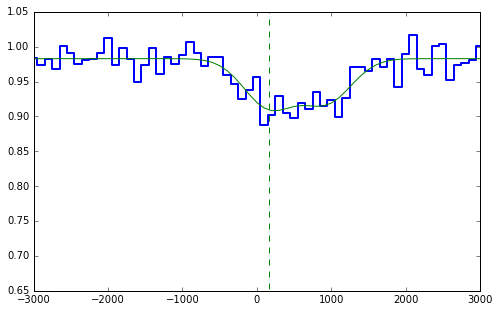

In [21]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=400.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1169.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=-81.2644844525))


<CompoundModel25(amplitude_0=0.9888759588753212, amplitude_1=0.038211724060284384, mean_1=-81.26448445252412, stddev_1=230.02900509674575, amplitude_2=0.038211724060284384, mean_2=687.7355155474759, stddev_2=230.02900509674575)>

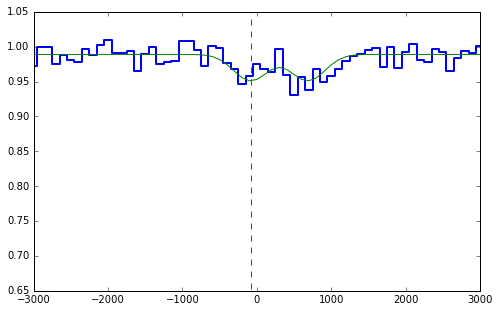

In [22]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.05,mean=869.,stddev=250.)
c_init = models.Const1D(amplitude=0.99)
model_init = c_init*g_2796_init*g_2803_init
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#For some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_median_fit.dat')
model_final

# MgII at z = 1 stack

## Mean stack  

('Centroid velocity in km/s = ', Parameter('mean_1', value=-9.38346169633))


<CompoundModel1(amplitude_0=0.9928443313665107, amplitude_1=0.03487518929446777, mean_1=-9.383461696325682, stddev_1=160.7750854212131, amplitude_2=0.02552420690073549, mean_2=759.6165383036744, stddev_2=160.7750854212131)>

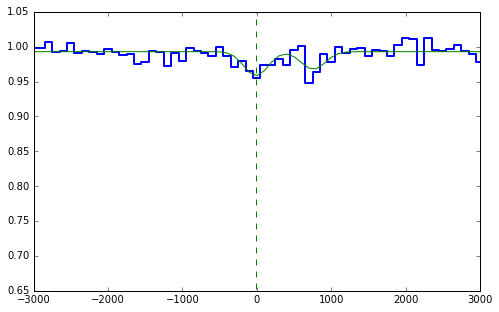

In [2]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_mean_fit.dat')
model_final

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=-99.6009144825))


<CompoundModel3(amplitude_0=0.9985079631680934, amplitude_1=0.01649071099317348, mean_1=-99.6009144825078, stddev_1=177.62512659419423, amplitude_2=0.012711027697178192, mean_2=669.3990855174922, stddev_2=177.62512659419423)>

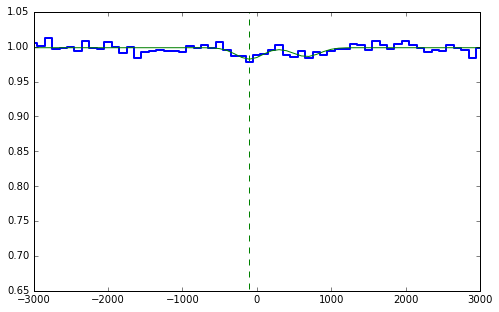

In [3]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_median_fit.dat')
model_final

# CIV foreground quasar stack 

<CompoundModel92(slope_0=1.6216453676836206e-06, intercept_0=0.9835803072187345, amplitude_1=0.028672582135876, mean_1=-2512.039953476008, stddev_1=2079.834165724614, amplitude_2=0.028672582135876, mean_2=-2014.0399534760081, stddev_2=2079.834165724614)>

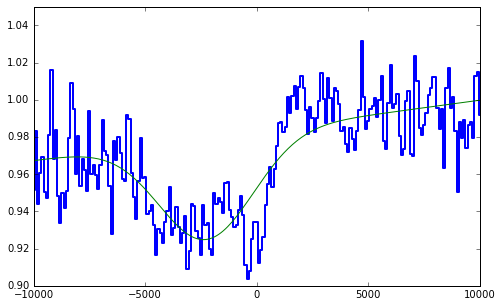

In [60]:
CIV_stack = fits.open('Output/QPQ9_1548_fg_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g1_1548_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.,stddev=1000.)
g1_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.+498.,stddev=1000.)
#g2_1548_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.,stddev=500.)
#g2_1550_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.+498.,stddev=500.)
l_init = models.Linear1D(intercept=0.97,slope=0.00001)
#model_init = l_init*(g1_1548_init*g1_1550_init)*(g2_1548_init*g2_1550_init)
model_init = l_init*(g1_1548_init*g1_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#def tie_mean4(model):
#    mean_4 = model.mean_3 + 498.
#    return mean_4
#def tie_stddev4(model):
#    stddev_4 = model.stddev_3
#    return stddev_4
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.mean_4.tied = tie_mean4
#model_init.stddev_4.tied = tie_stddev4
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.axis([-10000,10000,0.90,1.05])
model_final
